# Libraries

In [1]:
from pathlib import Path 
import pandas as pd 
import tarfile 
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import sklearn


# I. Download data

In [2]:
# The data set is in folder M682finalproject

stroke_data = pd.read_csv(Path("healthcare-dataset-stroke-data.csv")) 

stroke_data.head(10)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


Each row represents the information of a person. There are 12 attributes: id,	gender,	age,	hypertension,	heart_disease,	ever_married,	work_type,	Residence_type,	avg_glucose_level,	bmi,	smoking_status,	stroke.

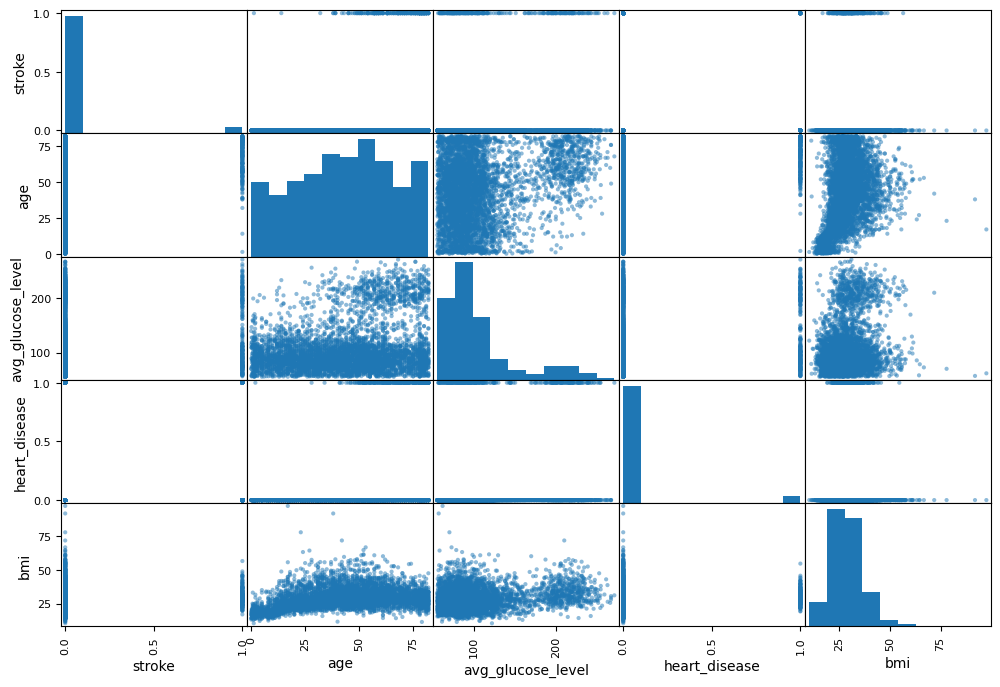

In [3]:
from pandas.plotting import scatter_matrix 
attributes = ["stroke", "age", 
"avg_glucose_level", 
"heart_disease",  "bmi" ] #"hypertension", "ever_married",
scatter_matrix(stroke_data[attributes], figsize=(12, 8)) 
plt.show()

In [4]:
stroke_data["gender"].value_counts(ascending = True)


gender
Other        1
Male      2115
Female    2994
Name: count, dtype: int64

In [5]:
stroke_data["ever_married"].value_counts(ascending = True)

ever_married
No     1757
Yes    3353
Name: count, dtype: int64

In [6]:
stroke_data["work_type"].value_counts(ascending = True)

work_type
Never_worked       22
Govt_job          657
children          687
Self-employed     819
Private          2925
Name: count, dtype: int64

In [7]:
stroke_data["Residence_type"].value_counts(ascending = True)

Residence_type
Rural    2514
Urban    2596
Name: count, dtype: int64

In [8]:
stroke_data["smoking_status"].value_counts(ascending = True)

smoking_status
smokes              789
formerly smoked     885
Unknown            1544
never smoked       1892
Name: count, dtype: int64

In [9]:
stroke_data["stroke"].value_counts(ascending = True)

stroke
1     249
0    4861
Name: count, dtype: int64

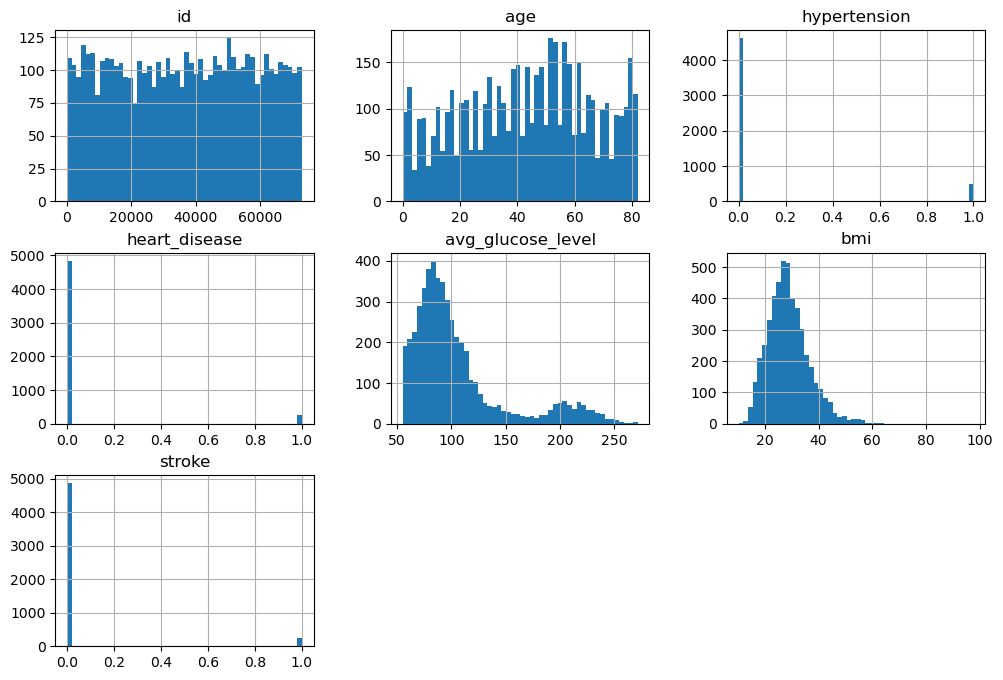

In [10]:
import matplotlib.pyplot as plt
stroke_data.hist(bins=50, figsize=(12, 8))
plt.show()

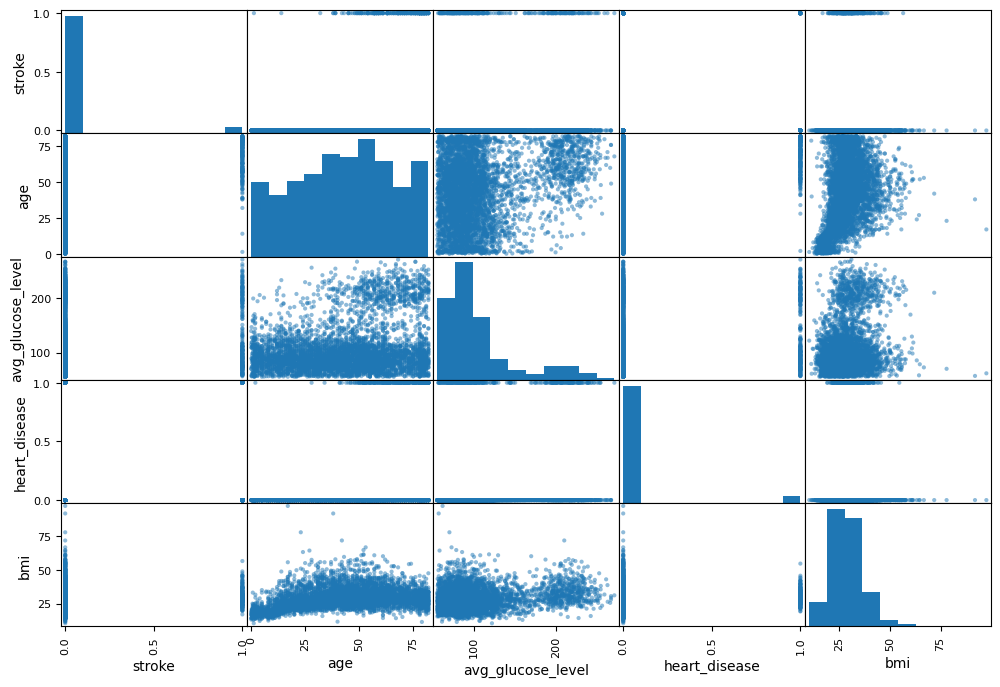

In [11]:
from pandas.plotting import scatter_matrix 
attributes = ["stroke", "age", 
"avg_glucose_level", 
"heart_disease",  "bmi" ] #"hypertension", "ever_married",
scatter_matrix(stroke_data[attributes], figsize=(12, 8)) 
plt.show()

# Preparing data

## Numeric data

In [12]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are 5110 instances in the dataset. Notice that "bmi" attribute has only 4909 non-null values, meaning 201 values are missing.
There are 7 numerical attributes including 4 integer-type attributes and 3 float-type attributes.
There are categorical attributes.
We will look at the categories and their distributions



We can choose to either get rid of the whole attribute or set the missing values to some value (zero, the mean, the median, etc.). 
In this case, because we suspect that bmi may affect the risk of getting strokes, we will imputate the data.

Because the new data coming may have missing values in other numeric attributes, we use "sklearn.impute" to fill in the missing values

In [13]:
from sklearn.impute import SimpleImputer 
imputer_median = SimpleImputer(strategy='median')
stroke_data_num = stroke_data.select_dtypes(include=[np.number])
imputer_median.fit(stroke_data_num)

SimpleImputer(strategy='median')

In [14]:
X = imputer_median.transform(stroke_data_num)
stroke_data_num_filled = pd.DataFrame(X, columns=stroke_data_num.columns,
                            index=stroke_data_num.index)


In [15]:
stroke_data_num_filled.head(10)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046.0,67.0,0.0,1.0,228.69,36.6,1.0
1,51676.0,61.0,0.0,0.0,202.21,28.1,1.0
2,31112.0,80.0,0.0,1.0,105.92,32.5,1.0
3,60182.0,49.0,0.0,0.0,171.23,34.4,1.0
4,1665.0,79.0,1.0,0.0,174.12,24.0,1.0
5,56669.0,81.0,0.0,0.0,186.21,29.0,1.0
6,53882.0,74.0,1.0,1.0,70.09,27.4,1.0
7,10434.0,69.0,0.0,0.0,94.39,22.8,1.0
8,27419.0,59.0,0.0,0.0,76.15,28.1,1.0
9,60491.0,78.0,0.0,0.0,58.57,24.2,1.0


## Categorial data

In [16]:
stroke_data["gender"].value_counts(ascending = True)

gender
Other        1
Male      2115
Female    2994
Name: count, dtype: int64

In [17]:
stroke_data["ever_married"].value_counts(ascending = True)

ever_married
No     1757
Yes    3353
Name: count, dtype: int64

In [18]:
stroke_data["work_type"].value_counts(ascending = True)

work_type
Never_worked       22
Govt_job          657
children          687
Self-employed     819
Private          2925
Name: count, dtype: int64

In [19]:
stroke_data["Residence_type"].value_counts(ascending = True)

Residence_type
Rural    2514
Urban    2596
Name: count, dtype: int64

In [20]:
stroke_data["smoking_status"].value_counts(ascending = True)

smoking_status
smokes              789
formerly smoked     885
Unknown            1544
never smoked       1892
Name: count, dtype: int64

Summary of the numerical attributes

In [21]:
stroke_data_cat = stroke_data.select_dtypes(include=[object])
stroke_data_cat.head(5)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [22]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

stroke_data_cat_enc = ord_enc.fit_transform(stroke_data_cat)


In [23]:
imputer_median.fit(stroke_data_cat_enc)
X = imputer_median.transform(stroke_data_cat_enc)
stroke_data_cat_filled = pd.DataFrame(X, columns=stroke_data_cat.columns, index=stroke_data_cat.index)


## Combine num and cat

In [24]:
stroke_data = pd.concat([stroke_data_num_filled, stroke_data_cat_filled], axis=1).reindex(stroke_data_num_filled.index)
stroke_data.head(10)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,9046.0,67.0,0.0,1.0,228.69,36.6,1.0,1.0,1.0,2.0,1.0,1.0
1,51676.0,61.0,0.0,0.0,202.21,28.1,1.0,0.0,1.0,3.0,0.0,2.0
2,31112.0,80.0,0.0,1.0,105.92,32.5,1.0,1.0,1.0,2.0,0.0,2.0
3,60182.0,49.0,0.0,0.0,171.23,34.4,1.0,0.0,1.0,2.0,1.0,3.0
4,1665.0,79.0,1.0,0.0,174.12,24.0,1.0,0.0,1.0,3.0,0.0,2.0
5,56669.0,81.0,0.0,0.0,186.21,29.0,1.0,1.0,1.0,2.0,1.0,1.0
6,53882.0,74.0,1.0,1.0,70.09,27.4,1.0,1.0,1.0,2.0,0.0,2.0
7,10434.0,69.0,0.0,0.0,94.39,22.8,1.0,0.0,0.0,2.0,1.0,2.0
8,27419.0,59.0,0.0,0.0,76.15,28.1,1.0,0.0,1.0,2.0,0.0,0.0
9,60491.0,78.0,0.0,0.0,58.57,24.2,1.0,0.0,1.0,2.0,1.0,0.0


Count duplicate and non-duplicate rows

In [25]:
print(stroke_data.duplicated().sum())

0


Check corrolation

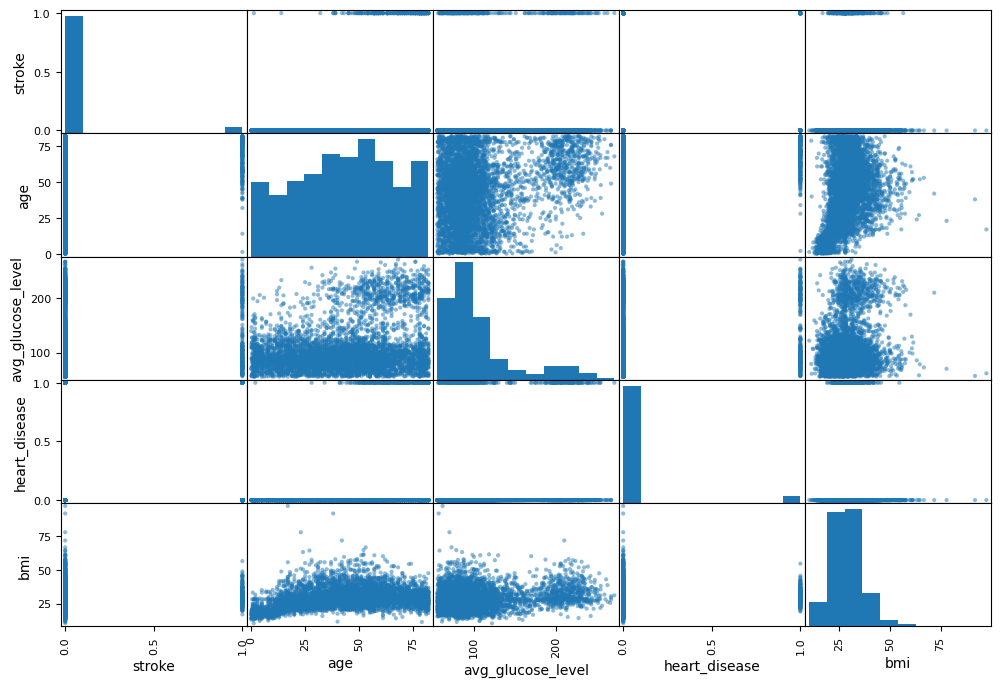

In [26]:
from pandas.plotting import scatter_matrix 
attributes = ["stroke", "age", 
"avg_glucose_level", 
"heart_disease",  "bmi" ] #"hypertension", "ever_married",
scatter_matrix(stroke_data[attributes], figsize=(12, 8)) 
plt.show()

We see that there is no duplicated rows

In [27]:
#Binary cols
cat_hypertension = ['0' if val == 0 else '1' for val in stroke_data['hypertension']]
cat_heart_disease = ['0' if val == 0 else '1' for val in stroke_data['heart_disease']]
cat_stroke = ['0' if val == 0 else '1' for val in stroke_data['stroke']]

In [28]:
num_cols = ['age', 'bmi', 'avg_glucose_level']
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

We now start looking at the general info from the data

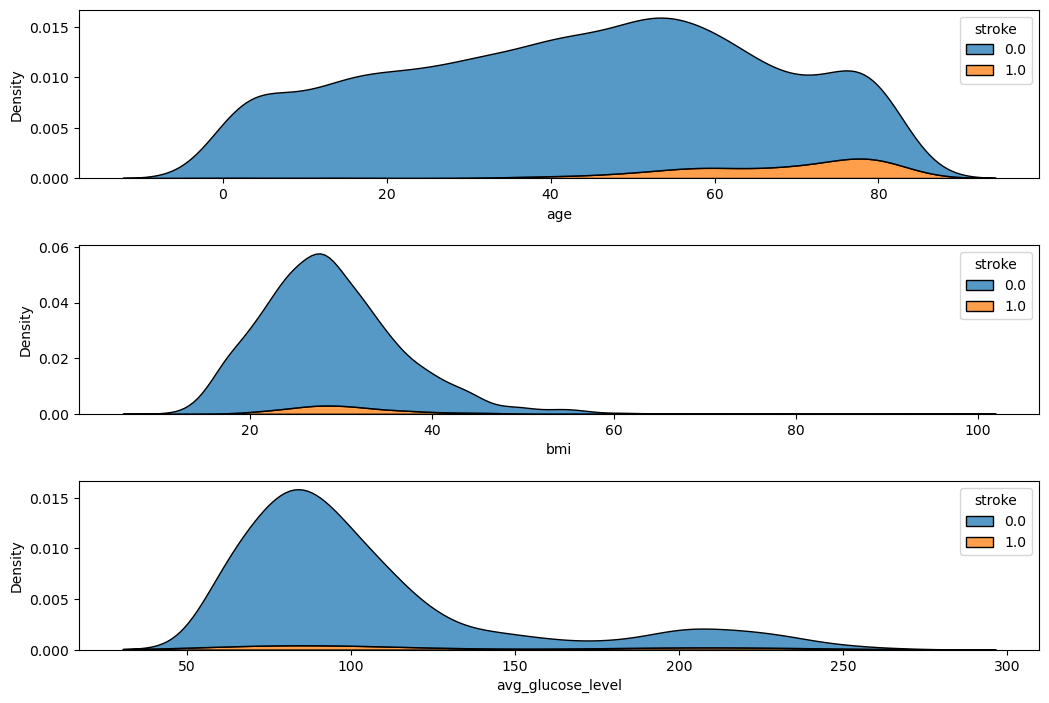

In [29]:
#Numerical attributes
import seaborn as sns
# Create a figure and a grid of subplots
fig, axs = plt.subplots(len(num_cols), figsize=(12,8))
k = 0
for i in num_cols:    
    sns.kdeplot(x=stroke_data_num[i], hue='stroke', data=stroke_data, multiple='stack', ax=axs[k])
    k += 1
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()   

#Categorical attributes

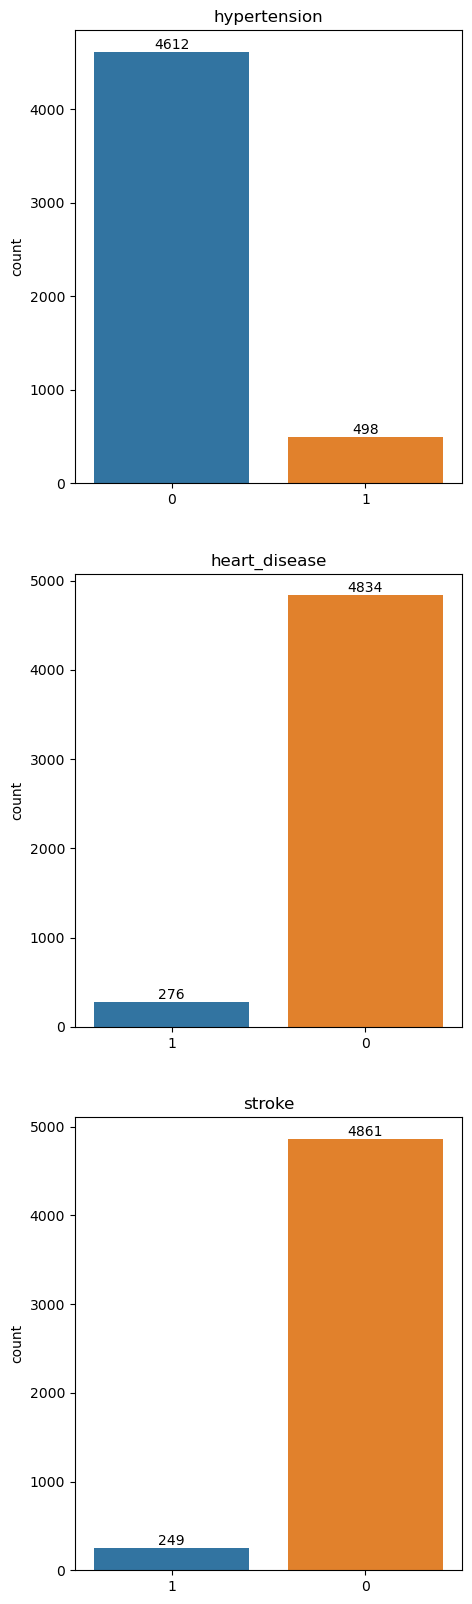

In [30]:


fig, axs = plt.subplots(3, figsize=(5,20))

ax1 = sns.countplot(x=cat_hypertension, data=stroke_data,  ax=axs[0])
ax1.bar_label(ax1.containers[0])
ax1.tick_params(axis='x')
ax1.set_title('hypertension')

ax2 = sns.countplot(x=cat_heart_disease, data=stroke_data,  ax=axs[1])
ax2.bar_label(ax2.containers[0])
ax2.tick_params(axis='x')
ax2.set_title('heart_disease')

ax3 = sns.countplot(x=cat_stroke, data=stroke_data,  ax=axs[2])
ax3.bar_label(ax3.containers[0])
ax3.tick_params(axis='x')
ax3.set_title('stroke')

plt.show()


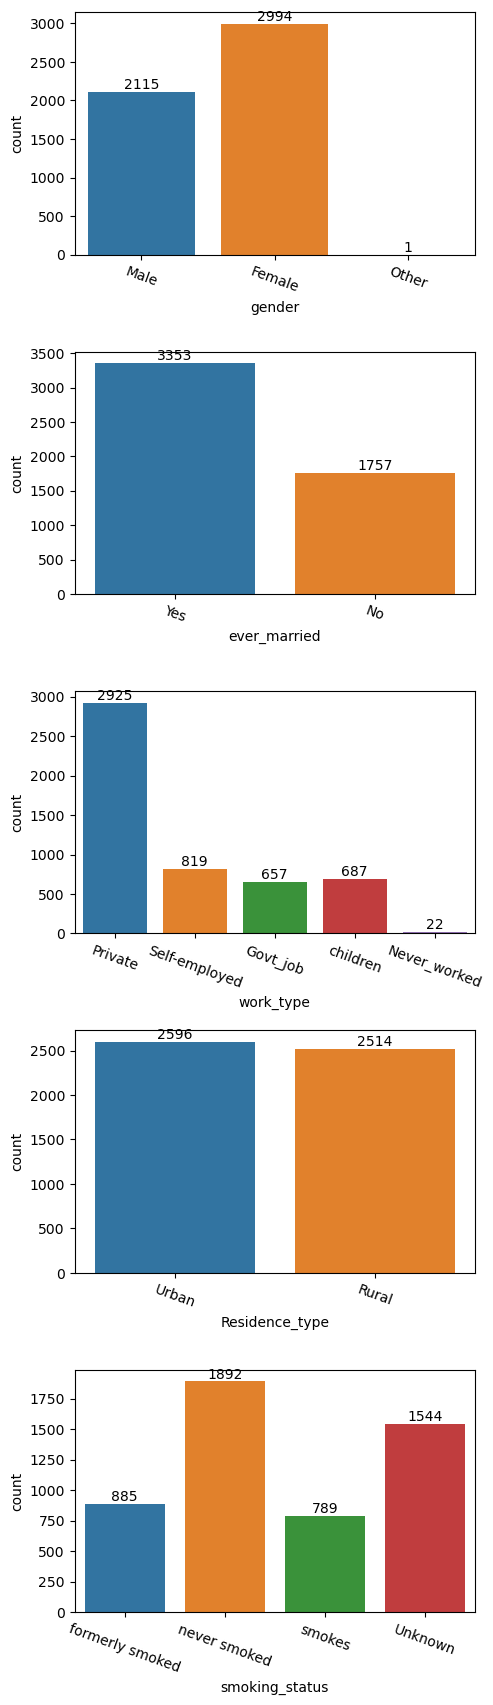

In [31]:
fig, axs = plt.subplots(len(cat_cols), figsize=(5,20))
k=0
for i in cat_cols:
    ax = sns.countplot(x=stroke_data_cat[i], data=stroke_data,  ax=axs[k])
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=340)
    k += 1
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()




In [32]:
corr_matrix = stroke_data.corr()
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.036110
smoking_status       0.028123
Residence_type       0.015458
gender               0.008929
id                   0.006388
work_type           -0.032316
Name: stroke, dtype: float64

We see that stroke-risk is higher when we get older.

Now we want to split the data. We can split the data set using id numbers. However, we want to split it based on age groups because we suspect that each age group has a certain risk.

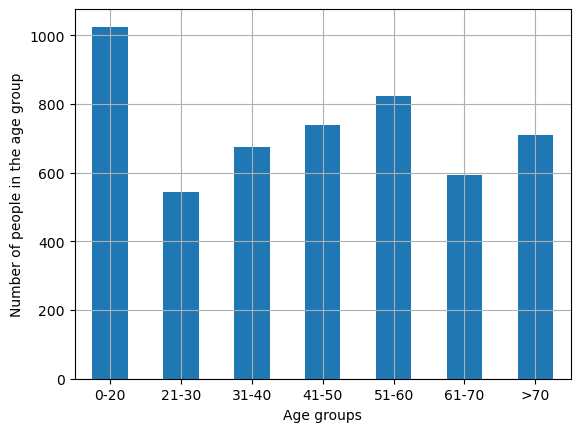

In [44]:
stroke_data["age_groups"] = pd.cut(stroke_data["age"],
                                 bins=[0., 20, 30, 40, 50, 60, 70, np.inf],
labels=["0-20", "21-30", "31-40", "41-50", "51-60", "61-70", ">70"])

stroke_data["age_groups"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Age groups")
plt.ylabel("Number of people in the age group")
plt.show()

This shows that there is no signigicantly big gaps between the numbers of instances in the groups

# Creat a test set

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    stroke_data, stroke_data["stroke"], test_size=0.20, stratify=stroke_data['age_groups'],
random_state=42)
x_train.head(5)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status,age_groups
3366,3946.0,22.0,0.0,0.0,89.06,27.7,0.0,0.0,1.0,2.0,1.0,2.0,21-30
4650,68074.0,54.0,0.0,0.0,100.47,50.2,0.0,1.0,1.0,2.0,0.0,1.0,51-60
3063,33726.0,8.0,0.0,0.0,72.81,18.2,0.0,0.0,0.0,4.0,1.0,0.0,0-20
905,9262.0,31.0,0.0,0.0,76.26,35.6,0.0,0.0,1.0,2.0,0.0,2.0,31-40
95,2458.0,78.0,0.0,0.0,235.63,32.3,1.0,0.0,1.0,2.0,0.0,2.0,>70


In [46]:
y_train.shape


(4088,)

In [47]:
x_train['age_groups'].value_counts() / len(x_train)

age_groups
0-20     0.200587
51-60    0.161204
41-50    0.144569
>70      0.138943
31-40    0.131849
61-70    0.116194
21-30    0.106654
Name: count, dtype: float64

In [48]:
x_train = x_train.drop(['age_groups','id','stroke'], axis=1)
x_test = x_test.drop(['age_groups','id','stroke'], axis=1)

In [49]:
x_train.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
3366,22.0,0.0,0.0,89.06,27.7,0.0,1.0,2.0,1.0,2.0
4650,54.0,0.0,0.0,100.47,50.2,1.0,1.0,2.0,0.0,1.0
3063,8.0,0.0,0.0,72.81,18.2,0.0,0.0,4.0,1.0,0.0
905,31.0,0.0,0.0,76.26,35.6,0.0,1.0,2.0,0.0,2.0
95,78.0,0.0,0.0,235.63,32.3,0.0,1.0,2.0,0.0,2.0


Make a copy of the strat_train_set

## Transformation

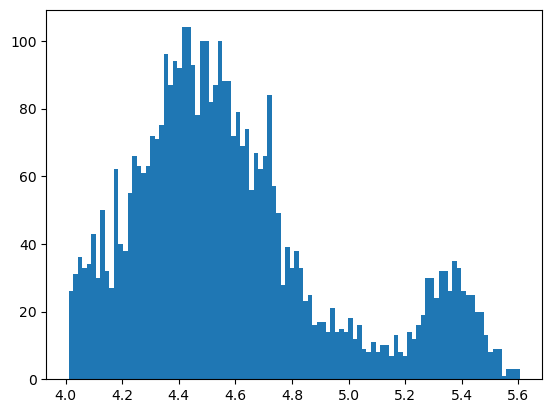

In [50]:
from sklearn.preprocessing import FunctionTransformer 
log_transformer = FunctionTransformer(np.log, 
inverse_func=np.exp) 
log_avg_glucose_level= log_transformer.transform(x_train[["avg_glucose_level"]])
plt.hist(log_avg_glucose_level, bins=100)
plt.show()


This looks less heavy-tail

In [51]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = ["age"]
cat_attribs = ["gender", "ever_married", "work_type", "Residence_type", 
               "smoking_status", "hypertension", "heart_disease"]
log_attribs = ["avg_glucose_level", "bmi"]

log_pipeline = make_pipeline(
      SimpleImputer(strategy="median"),
      FunctionTransformer(np.log, feature_names_out="one-to-one"),
      StandardScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                             OneHotEncoder(handle_unknown="ignore"))
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
StandardScaler())

preprocessing = ColumnTransformer([
      ("num", num_pipeline, num_attribs),
      ("cat", cat_pipeline, cat_attribs),
      ("log", log_pipeline, log_attribs)
])


stroke_prepared = preprocessing.fit_transform(x_train)
stroke_prepared.shape

(4088, 23)

In [52]:
names = preprocessing.get_feature_names_out()

In [53]:
data = pd.DataFrame(stroke_prepared, columns=names,index=x_train.index)
data.head(5)


,num__age,cat__gender_0.0,cat__gender_1.0,cat__gender_2.0,cat__ever_married_0.0,cat__ever_married_1.0,cat__work_type_0.0,cat__work_type_1.0,cat__work_type_2.0,cat__work_type_3.0,...,cat__smoking_status_0.0,cat__smoking_status_1.0,cat__smoking_status_2.0,cat__smoking_status_3.0,cat__hypertension_0.0,cat__hypertension_1.0,cat__heart_disease_0.0,cat__heart_disease_1.0,log__avg_glucose_level,log__bmi
3366,-0.938015,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.292289,-0.029806
4650,0.478857,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.039507,2.255338
3063,-1.557896,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.846774,-1.644022
905,-0.539520,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.719352,0.934522
95,1.541510,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.385640,0.560655


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4088 entries, 3366 to 912
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num__age                 4088 non-null   float64
 1   cat__gender_0.0          4088 non-null   float64
 2   cat__gender_1.0          4088 non-null   float64
 3   cat__gender_2.0          4088 non-null   float64
 4   cat__ever_married_0.0    4088 non-null   float64
 5   cat__ever_married_1.0    4088 non-null   float64
 6   cat__work_type_0.0       4088 non-null   float64
 7   cat__work_type_1.0       4088 non-null   float64
 8   cat__work_type_2.0       4088 non-null   float64
 9   cat__work_type_3.0       4088 non-null   float64
 10  cat__work_type_4.0       4088 non-null   float64
 11  cat__Residence_type_0.0  4088 non-null   float64
 12  cat__Residence_type_1.0  4088 non-null   float64
 13  cat__smoking_status_0.0  4088 non-null   float64
 14  cat__smoking_status_1.0  40

## Synthetic Minority Oversampling technique SMOTE


In [54]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train.ravel())


In [58]:
x_train_smote.head(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
0,22.0,0.0,0.0,89.06,27.7,0.0,1.0,2.0,1.0,2.0
1,54.0,0.0,0.0,100.47,50.2,1.0,1.0,2.0,0.0,1.0


In [59]:
y_train_smote.head(2)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

# Models

## Logistic regression

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

logistic_reg = make_pipeline(preprocessing, LogisticRegression())
logistic_reg.fit(x_train_smote, y_train_smote)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ever_marr...
                                                   'Residence_type',
                                                   'smoking_status',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avg_glucose_level',
                                                   'bmi'])])),
                ('logisticregression', LogisticRegression())])

In [119]:
y_pred = logistic_reg.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = logistic_reg, X = x_train_smote, y = y_train_smote, cv = 3)   #K-Fold Validation
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score
print('Logistic regression:')
print(cm)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('')
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('')
print('ROC AUC Score: {:.2f}'.format(roc))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))

Logistic regression:
[[977   1]
 [ 42   2]]
Accuracy Score:  0.9579256360078278

K-Fold Validation Mean Accuracy: 96.20 %

Standard Deviation: 3.49 %

ROC AUC Score: 0.52

Precision: 0.67

Recall: 0.05

F1: 0.09


In [81]:
from sklearn.metrics import accuracy_score
stroke_predictions = logistic_reg.predict(x_test)
accuracy_score(stroke_predictions, y_test)


0.9579256360078278

## Random Forest Classification

In [120]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = make_pipeline(preprocessing,
                            RandomForestClassifier(random_state=42))
forest_clf.fit(x_train_smote, y_train_smote)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ever_marr...
                                                   'smoking_status',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avg_glucose_level',
                                                   'bmi'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [129]:
y_pred = forest_clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = forest_clf, X = x_train_smote, y = y_train_smote, cv = 3)   #K-Fold Validation
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score
print('Random Forest Classification:')
print(cm)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('')
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('')
print('ROC AUC Score: {:.2f}'.format(roc))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))

Random Forest Classification:
[[971   7]
 [ 43   1]]
Accuracy Score:  0.9510763209393346

K-Fold Validation Mean Accuracy: 96.92 %

Standard Deviation: 3.18 %

ROC AUC Score: 0.51

Precision: 0.12

Recall: 0.02

F1: 0.04


## Decision trees

In [122]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing,
                            DecisionTreeRegressor(random_state=42))
tree_reg.fit(x_train_smote, y_train_smote)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ever_marr...
                                                   'smoking_status',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avg_glucose_level',
                                                   'bmi'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [123]:
from sklearn.metrics import *

#tree_rmse = mean_squared_error(housing_labels, housing_predictions,
#... squared=False) ...
#>>> tree_rmse

y_pred = tree_reg.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = tree_reg, X = x_train_smote, y = y_train_smote, cv = 3)   #K-Fold Validation
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score
print('Decision trees regression:')
print(cm)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('')
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('')
print('ROC AUC Score: {:.2f}'.format(roc))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))

Decision trees regression:
[[922  56]
 [ 38   6]]
Accuracy Score:  0.9080234833659491

K-Fold Validation Mean Accuracy: -21.93 %

Standard Deviation: 88.36 %

ROC AUC Score: 0.54

Precision: 0.10

Recall: 0.14

F1: 0.11


In [84]:
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg, 
                              x_train_smote, y_train_smote, 
                              scoring="neg_root_mean_squared_error", 
                              cv=10)
pd.Series(tree_rmses).describe()
print(tree_rmses)

[0.33074932 0.27555957 0.30651443 0.29799847 0.28247846 0.179374
 0.12943175 0.17586311 0.14801087 0.14359163]


In [85]:
from sklearn.ensemble import RandomForestRegressor 
forest_reg = make_pipeline(preprocessing,RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, 
                                x_train_smote, y_train_smote, 
                                scoring="neg_root_mean_squared_error", cv=10)
print(forest_rmses)
pd.Series(forest_rmses).describe()

[0.22838192 0.19618235 0.20926635 0.2087488  0.21492119 0.1510589
 0.1190128  0.14947934 0.1408667  0.1242244 ]


count    10.000000
mean      0.174214
std       0.041233
min       0.119013
25%       0.143020
50%       0.173621
75%       0.209137
max       0.228382
dtype: float64

## Stochastic gradient descent (SGD)

In [124]:
from sklearn.linear_model import SGDClassifier 
sgd_clf = make_pipeline(preprocessing, 
                        SGDClassifier(random_state=42))
sgd_clf.fit(x_train_smote,y_train_smote)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ever_marr...
                                                   'Residence_type',
                                                   'smoking_status',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avg_glucose_level',
                                                   'bmi'])])),
                ('sgdclassifier', SGDClassifier(random_state=42))])

In [125]:
y_pred = sgd_clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = sgd_clf, X = x_train_smote, y = y_train_smote, cv = 10)   #K-Fold Validation
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score
print('Stochastic gradient descent regression:')
print(cm)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('')
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('')
print('ROC AUC Score: {:.2f}'.format(roc))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))

Stochastic gradient descent regression:
[[978   0]
 [ 44   0]]
Accuracy Score:  0.9569471624266145

K-Fold Validation Mean Accuracy: 96.22 %

Standard Deviation: 7.62 %

ROC AUC Score: 0.50

Precision: 0.00

Recall: 0.00

F1: 0.00


/Users/le/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVC

In [126]:
from sklearn.svm import SVC

svm_clf = make_pipeline(preprocessing,
                          SVC(C=1, random_state=42))
svm_clf.fit(x_train_smote, y_train_smote)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ever_marr...
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avg_glucose_level',
                                                   'bmi'])])),
                ('svc', SVC(C=1, random_state=42))])

In [128]:
y_pred = svm_clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = svm_clf, X = x_train, y = y_train, cv = 10)   #K-Fold Validation
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score
print('SVC model:')
print(cm)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('')
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('')
print('ROC AUC Score: {:.2f}'.format(roc))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))

SVC model:
[[977   1]
 [ 43   1]]
Accuracy Score:  0.9569471624266145

K-Fold Validation Mean Accuracy: 94.99 %

Standard Deviation: 0.12 %

ROC AUC Score: 0.51

Precision: 0.50

Recall: 0.02

F1: 0.04


## SVM with Poly Kernel

In [130]:
from sklearn.svm import SVC
poly_kernel_svm_clf = make_pipeline(preprocessing,
                                      SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(x_train_smote, y_train_smote)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ever_marr...
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avg_glucose_level',
                                                   'bmi'])])),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [131]:
y_pred = poly_kernel_svm_clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = poly_kernel_svm_clf, X = x_train_smote, y = y_train_smote, cv = 3)   #K-Fold Validation
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score
print('Stochastic gradient descent regression:')
print(cm)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('')
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('')
print('ROC AUC Score: {:.2f}'.format(roc))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))

Stochastic gradient descent regression:
[[974   4]
 [ 40   4]]
Accuracy Score:  0.9569471624266145

K-Fold Validation Mean Accuracy: 96.50 %

Standard Deviation: 3.43 %

ROC AUC Score: 0.54

Precision: 0.50

Recall: 0.09

F1: 0.15


## SVC with RBF Kernel

In [132]:
rbf_kernel_svm_clf = make_pipeline(preprocessing,
                                     SVC(kernel="rbf", gamma=0.1, C=1000))
rbf_kernel_svm_clf.fit(x_train_smote, y_train_smote)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avg_glucose_level',
                                                   'bmi'])])),
                ('svc', SVC(C=1000, gamma=0.1))])

In [133]:
y_pred = rbf_kernel_svm_clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = rbf_kernel_svm_clf, X = x_train_smote, y = y_train_smote, cv = 3)   #K-Fold Validation
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score
print('Stochastic gradient descent regression:')
print(cm)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('')
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('')
print('ROC AUC Score: {:.2f}'.format(roc))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))

Stochastic gradient descent regression:
[[933  45]
 [ 38   6]]
Accuracy Score:  0.9187866927592955

K-Fold Validation Mean Accuracy: 94.59 %

Standard Deviation: 2.73 %

ROC AUC Score: 0.55

Precision: 0.12

Recall: 0.14

F1: 0.13


## Decision Tree Classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = make_pipeline(preprocessing,
                              DecisionTreeClassifier(max_depth=2, random_state=42))

tree_clf.fit(x_train_smote, y_train_smote)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ever_marr...
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avg_glucose_level',
                                                   'bmi'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, random_state=42))])

In [ ]:
y_pred = tree_clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = tree_clf, X = x_train_smote, y = y_train_smote, cv = 10)   #K-Fold Validation
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score
print('Stochastic gradient descent regression:')
print(cm)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('')
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('')
print('ROC AUC Score: {:.2f}'.format(roc))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))

## KNeighbors Classification

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = make_pipeline(preprocessing,
                              KNeighborsClassifier())

knn_clf.fit(x_train_smote, y_train_smote)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ever_marr...
                                                   'Residence_type',
                                                   'smoking_status',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avg_glucose_level',
                                                   'bmi'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [109]:
y_pred = knn_clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = knn_clf, X = x_train_smote, y = y_train_smote, cv = 10)   #K-Fold Validation
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score
print('Stochastic gradient descent regression:')
print(cm)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('')
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('')
print('ROC AUC Score: {:.2f}'.format(roc))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))

Stochastic gradient descent regression:
[[969   9]
 [ 44   0]]
Accuracy Score:  0.9481409001956947

K-Fold Validation Mean Accuracy: 93.87 %

Standard Deviation: 6.74 %

ROC AUC Score: 0.50

Precision: 0.00

Recall: 0.00

F1: 0.00


## GaussianNB

In [116]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = make_pipeline(preprocessing, GaussianNB())
gnb_clf.fit(x_train_smote.toarray(), y_train_smote)

AttributeError: 'DataFrame' object has no attribute 'toarray'